In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from itertools import product

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, OPTICS, estimate_bandwidth, MeanShift, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

import warnings
warnings.filterwarnings('ignore')

c:\coding\python\MTS\ML\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('onlinefoods.csv')

print('There are {} rows and {} columns in our dataset.'.format(df.shape[0],df.shape[1]))

There are 388 rows and 13 columns in our dataset.


In [3]:
df.sample(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
100,24,Female,Single,Student,10001 to 25000,Post Graduate,3,12.9335,77.5691,560028,No,Positive,No
224,25,Female,Married,Student,No Income,Post Graduate,2,12.8834,77.5486,560062,Yes,Positive,Yes
275,23,Female,Single,Student,No Income,Post Graduate,4,13.0487,77.5923,560024,Yes,Positive,Yes
12,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes
325,27,Male,Married,Employee,25001 to 50000,Graduate,2,12.8845,77.6036,560076,Yes,Positive,Yes
346,26,Male,Married,Employee,More than 50000,Graduate,4,12.9048,77.6821,560036,Yes,Positive,Yes
153,21,Male,Single,Student,No Income,Graduate,2,12.9579,77.6309,560007,Yes,Positive,Yes
113,23,Female,Single,Student,No Income,Graduate,5,13.0206,77.6479,560043,Yes,Positive,Yes
365,22,Male,Single,Student,No Income,Graduate,3,13.0158,77.5390,560096,Yes,Positive,Yes
371,28,Male,Married,Employee,25001 to 50000,Graduate,3,12.9369,77.6407,560095,Yes,Positive,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [5]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


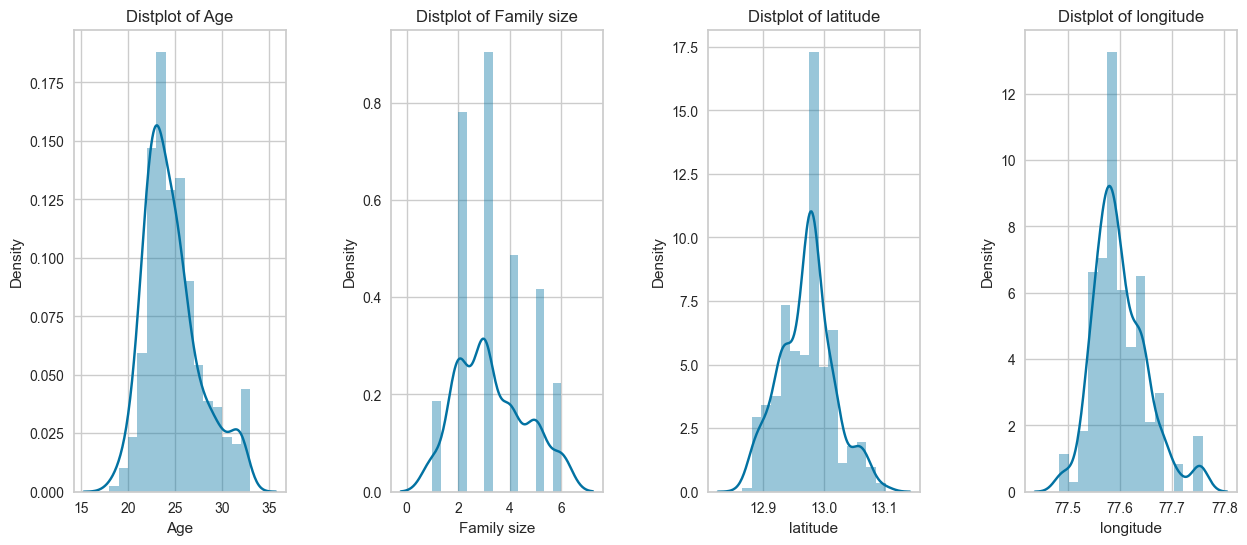

In [6]:
plt.figure(1, figsize=(15 , 6))
n = 0 
for x in ['Age', 'Family size', 'latitude' , 'longitude']:
    n += 1
    plt.subplot(1 , 4 , n)
    plt.subplots_adjust(hspace=0.5 , wspace=0.5)
    sns.distplot(df[x] , bins=15)
    plt.title('Distplot of {}'.format(x))
plt.show()

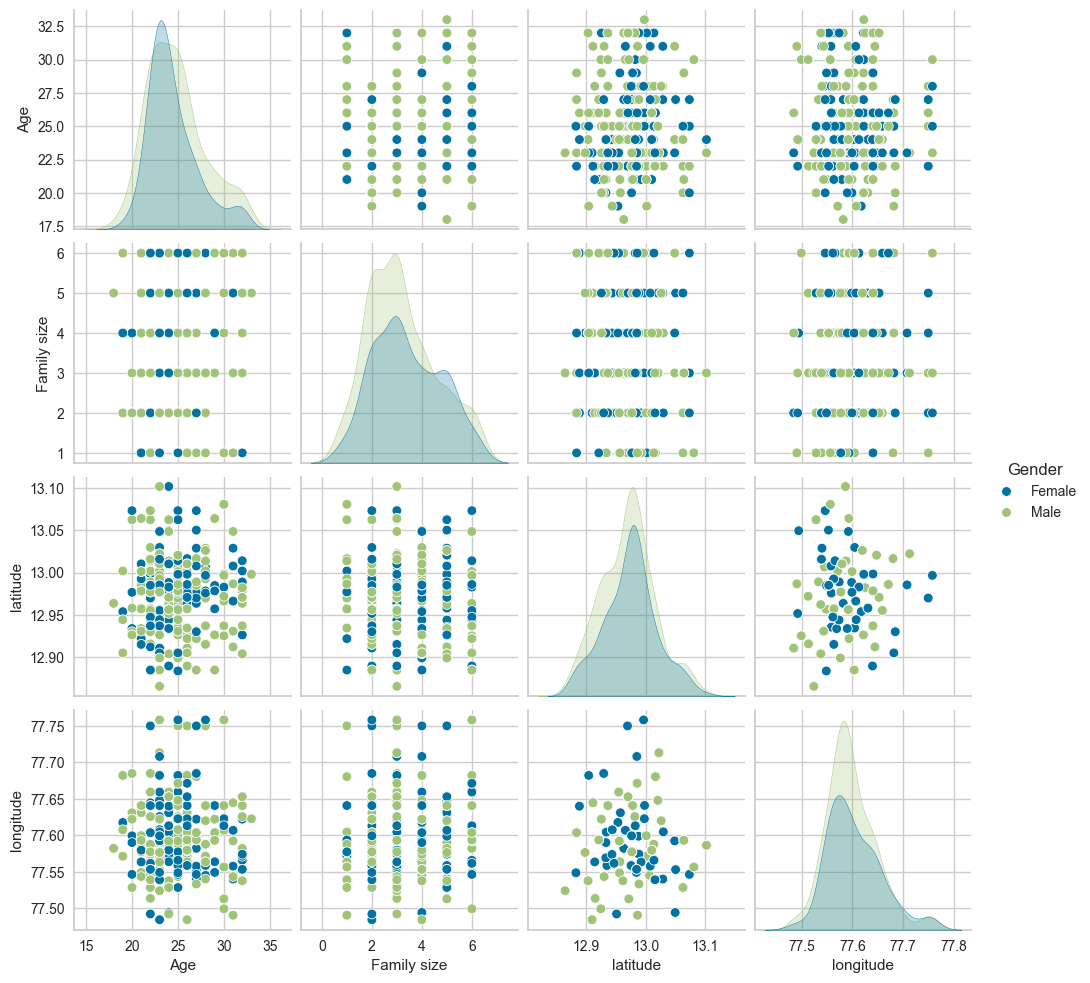

In [7]:
sns.pairplot(df, vars=['Age', 'Family size', 'latitude' , 'longitude'], hue="Gender")

In [8]:
# технические параметры k-means, которые мы будем использовать дальше
kmeans_params = {
    'init': 'k-means++',
    'n_init': 6,
    'max_iter': 300, 
    'tol': 0.0001,
    'random_state': 42,
    'algorithm': 'elkan'
}

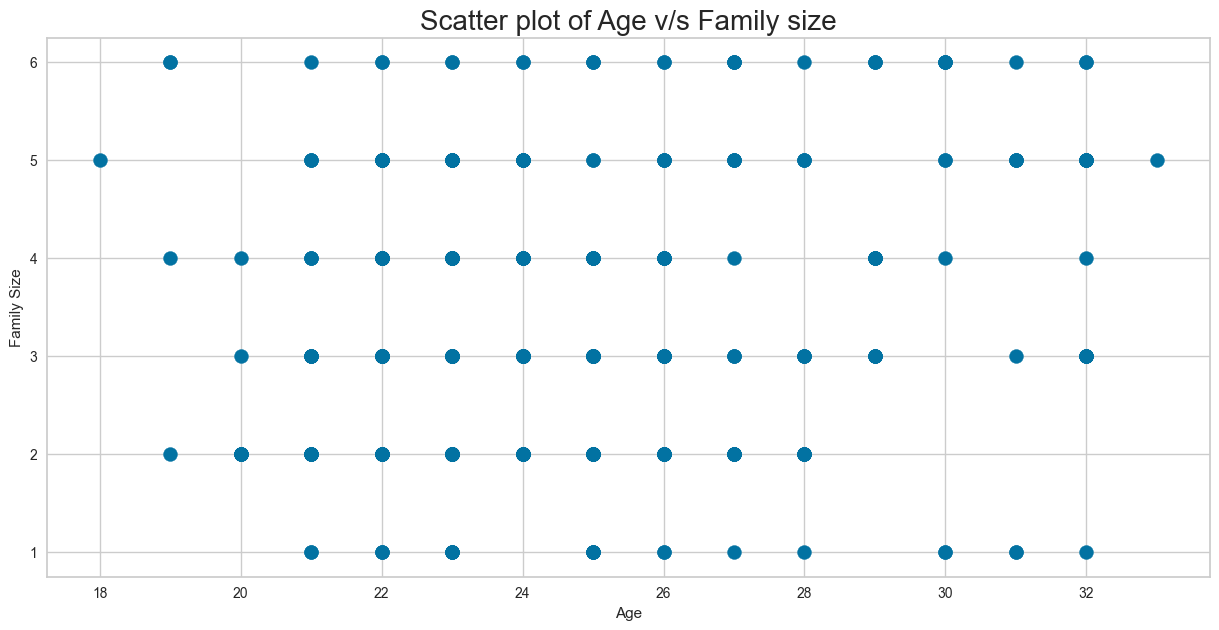

In [9]:
plt.figure(1, figsize=(15 , 7))
plt.title('Scatter plot of Age v/s Family size', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.scatter(x='Age', y='Family size', data=df, s=100)
plt.show()

In [10]:
X = df[['Age' , 'Family size']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = KMeans(n_clusters=n, **kmeans_params)
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

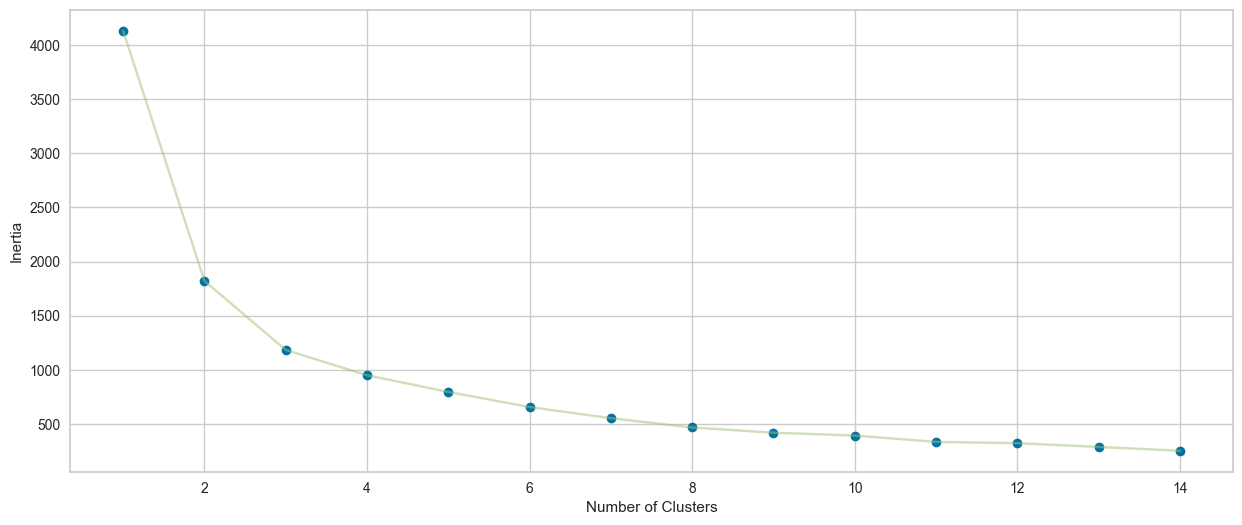

In [11]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

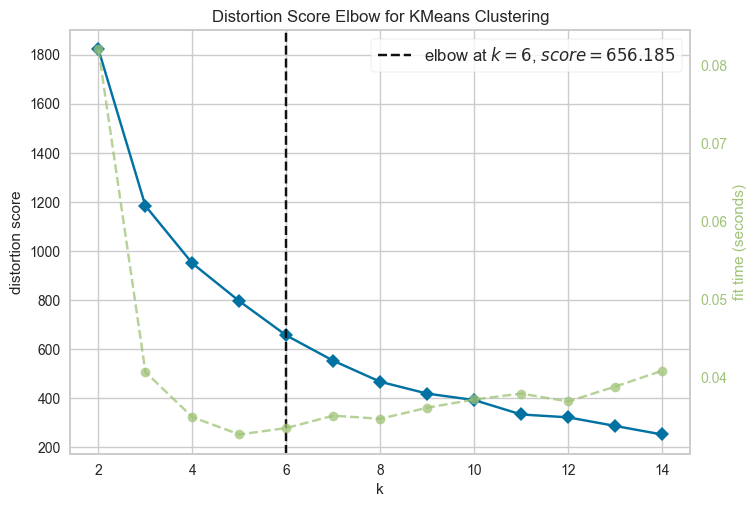

In [12]:
model = KMeans(**kmeans_params)
visualizer = KElbowVisualizer(model, k=(2, 15))

visualizer.fit(X)
visualizer.show()
plt.show()

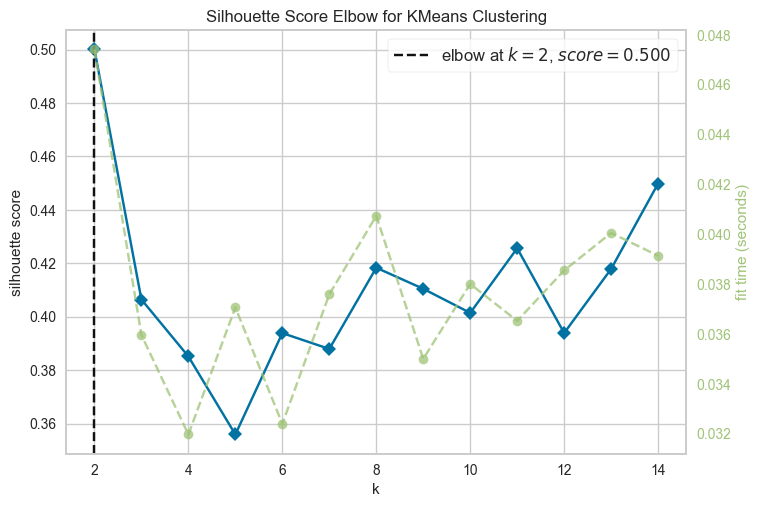

In [13]:
model = KMeans(**kmeans_params)
visualizer = KElbowVisualizer(model, k=(2, 15), metric='silhouette')

visualizer.fit(X)
visualizer.show()
plt.show()

In [14]:
kmeans = KMeans(n_clusters=2, **kmeans_params)

clusters = kmeans.fit_predict(X)

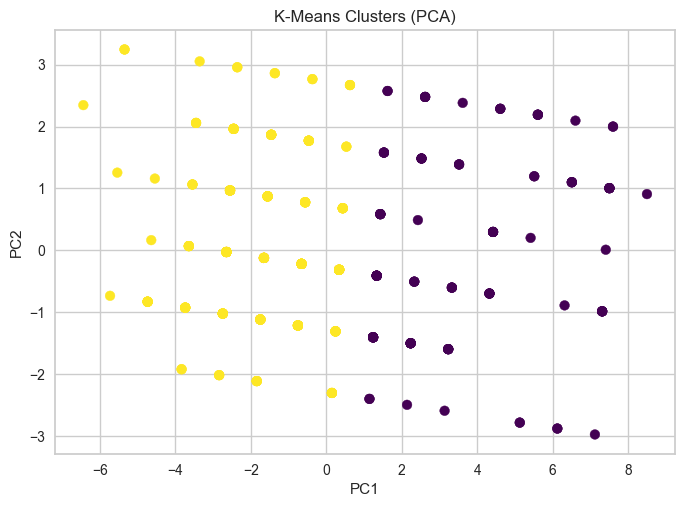

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clusters (PCA)')
plt.show()

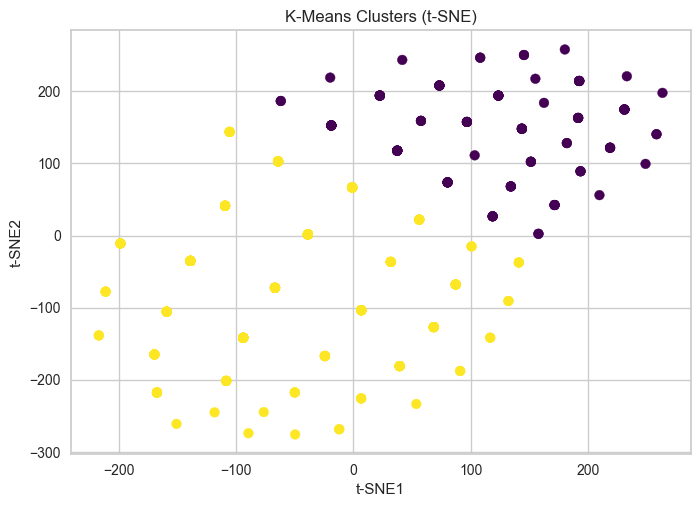

In [16]:
tsne = TSNE(n_components=2, random_state=42, perplexity=150)
X_tsne = tsne.fit_transform(X)

# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('K-Means Clusters (t-SNE)')
plt.show()

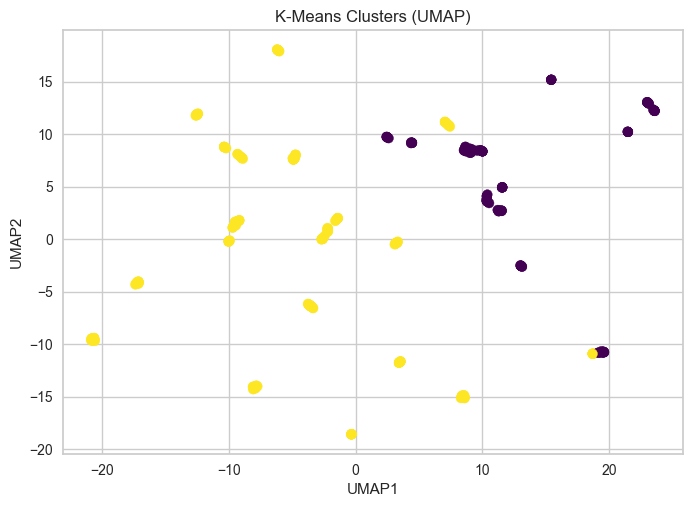

In [17]:
umap_ = umap.UMAP(n_components=2, random_state=42, n_neighbors=5|0, min_dist=0.05)
X_umap = umap_.fit_transform(X)

# Plot the clusters
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='viridis')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('K-Means Clusters (UMAP)')
plt.show()

Выводы:
Для данного датасета метод понижения размерности PCA оказался наиболее информативным для визуализации кластеров, полученных с помощью метода k-Means.

PCA четко разделил кластеры и сохранил их форму, в то время как другие методы (t-SNE и UMAP) не смогли этого сделать так же эффективно.